<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao


# Hardware Cuantico real

---








Cargamos las credenciales de nuestra cuenta e importamos las librerias iniciales

In [2]:
from qiskit import IBMQ
#si falla el load_account() ejecutar antes un save_account()
#IBMQ.save_account('YOUR API KEY', overwrite=True)
provider = IBMQ.load_account()

/tmp/ipykernel_4508/1425951765.py:4: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.load_account()
/tmp/ipykernel_4508/1425951765.py:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


Un [provider](https://docs.quantum.ibm.com/api/qiskit/providers) es un objeto que proporciona servicios externos a Terra, por ejemplo proporciona backends para la ejecucion de los sercivios.

Cuando cargamos nuestra cuenta podemos acceder a una serie de backends a través de la clase `Provider` de qiskit

### EJERCICIO

Itera `provider.backends()` e imprime por pantalla el resultado de sus metodos `.name()`, `.configuracion().n_qubits`

In [3]:
for b in provider.backends():
    print(b.name(), b.configuration().n_qubits)

ibmq_qasm_simulator 32
simulator_statevector 32
simulator_mps 100
simulator_extended_stabilizer 63
simulator_stabilizer 5000
ibm_brisbane 127
ibm_kyoto 127
ibm_osaka 127


Podemos usar la instruccion dir(obj) y vars(obj) para saber las propiedades y metodos que tiene el ultimo de los providers:

- Utiliza dir() para obtener una lista de todos los atributos (incluidos los métodos) del objeto.
- Utiliza vars() para obtener la propiedad __dict__ del objeto, que contiene variables de instancia

Prueba dir() sobre el objeto y sobre obj.configuracion()

Encuentra el conjunto de puertas base de cada backend

In [13]:
ultimo_provider=provider.backends()[-1]
print(dir(ultimo_provider),'\n')
print(vars(ultimo_provider),'\n')
print(ultimo_provider.active_jobs())

#el numero de puertas base
ultimo_provider.configuration().basis_gates

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_api_client', '_configuration', '_credentials', '_default_options', '_defaults', '_deprecate_id_instruction', '_get_run_config', '_options', '_properties', '_provider', '_submit_job', 'active_jobs', 'configuration', 'defaults', 'group', 'hub', 'id_warning_issued', 'job_limit', 'jobs', 'name', 'options', 'project', 'properties', 'provider', 'qobj_warning_issued', 'remaining_jobs_count', 'reservations', 'retrieve_job', 'run', 'set_options', 'status', 'version'] 

{'_configuration': <qiskit.providers.models.backendconfiguration.PulseBackendConfiguration object at 0x7f694f816290>, '_options': Options(s

['id', 'rz', 'sx', 'x', 'ecr', 'reset']

## Ejecutando circuitos en HW cuántico: compilacion de circuitos

Los backends a los que tenemos acceso son:

In [2]:
[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

[('ibmq_qasm_simulator', 32),
 ('simulator_statevector', 32),
 ('simulator_mps', 100),
 ('simulator_extended_stabilizer', 63),
 ('simulator_stabilizer', 5000),
 ('ibm_brisbane', 127),
 ('ibm_kyoto', 127),
 ('ibm_osaka', 127)]

In [ ]:
# si se tiene acceso a mas de un hub:
#provider = IBMQ.get_provider("ibm-q-internal")
#[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

Los vemos todos y consultamos cual es que tiene menos trabajos en cola (least busy)

Podemos usar la funcion `least_busy` para seleccionar el backend menos cargado en cada momento:

In [4]:
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(
                simulator=False,
                filters=lambda b: b.configuration().n_qubits >= 2))
backend

<IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>

### EJECUCION DE UN CIRCUITO

Creamos nuestro circuito de 2 qubits, un estado de Bell

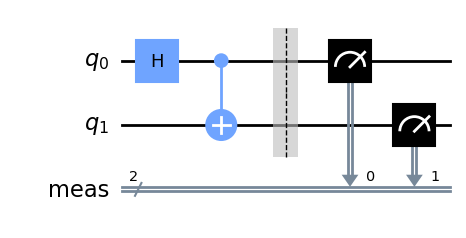

In [5]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw()

Lo ejecutamos siempre primero en un simulador

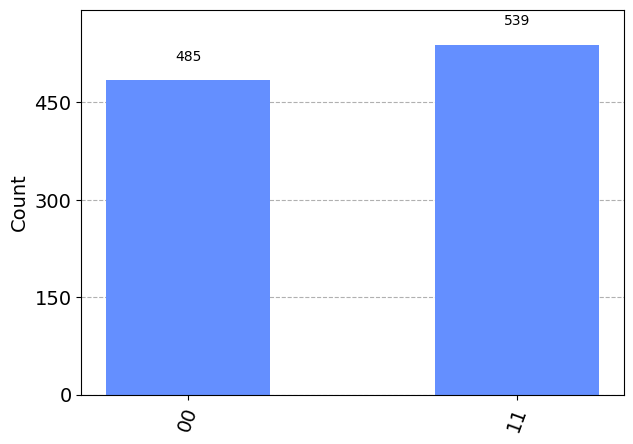

In [6]:
from qiskit import Aer
from qiskit.visualization import plot_histogram
sim = Aer.get_backend('aer_simulator')
result = sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)

In [7]:
#el metodo run sobre el backend crea un job 
job = sim.run(circuit)

In [8]:
job.result()

Result(backend_name='aer_simulator', backend_version='0.12.2', qobj_id='', job_id='c89e74f5-5870-4055-b3a6-d1870fd9547a', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 532, '0x3': 492}), header=QobjExperimentHeader(creg_sizes=[['meas', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-120', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=986967432, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'parallel_state_update': 8, 'sample_measure_time': 0.002683361, 'num_qubits': 2, 'device': 'CPU', 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.013544126)], date=2024-01-17T10:24:04.428568, status=COMPLETED, header=None, metadata={'time_taken_execute': 0.013650768, 'mpi_rank': 0, 'num_mpi_process

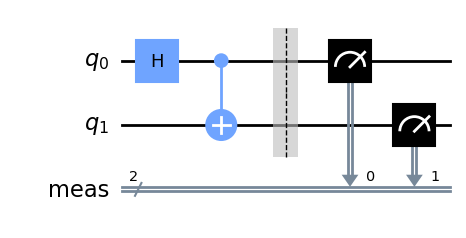

In [9]:
circuit.draw('mpl')

Vamos a lanzar la ejecucion de nuestro circuito al backend que tiene menos jobs en cola.

In [10]:
backend = least_busy(provider.backends(
                simulator=False,
                filters=lambda b: b.configuration().n_qubits >= 2))
backend

<IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>

Necesitamos transpilar el circuito al backend real

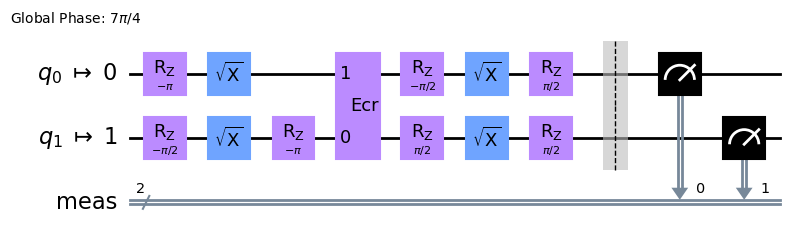

In [11]:
from qiskit import transpile

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw(idle_wires=False, fold=-1) #sin idle wires y todo en una linea

Notese que `transpiling` puede no tomar un backend y entonces simplemente no hace ninguna operacion de compilado del circuito.

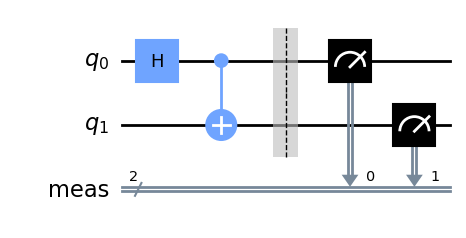

In [12]:
notranspiled_circuit = transpile(circuit)
notranspiled_circuit.draw(idle_wires=False, fold=-1) #sin idle wires y todo en una linea

Para el seguimiento de la ejecucion utilizamos la utilidad `job_watcher`, que nos va diciendo como estamos en la cola de forma interactiva

In [13]:
import qiskit.tools.jupyter
%qiskit_job_watcher  #lanzamos el widget de job_watcher para hacer seguimiento

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [14]:
job = backend.run(transpiled_circuit)

Ejecutamos el circuito

Para ver el estado de ejecucion:

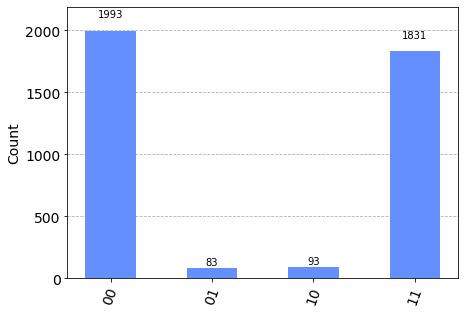

In [ ]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [15]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

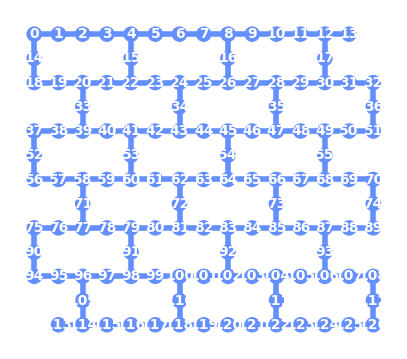

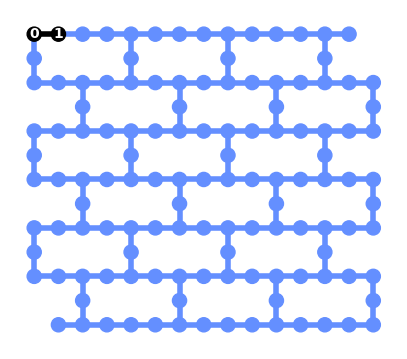

In [16]:
from qiskit.visualization import plot_circuit_layout, plot_gate_map
display(plot_gate_map(backend))
plot_circuit_layout(transpiled_circuit, backend)

Podemos ver como se ha ejecutado el circuito en los qubits del dispositivo y el mapa de puertas que se ha utilizado:

Cuando ha terminado obtenemos los resultados y podemos ver como se ha ejecutado nuestro circuito en el backend visualizando los qubits utilizados:

#### EJERCICIO

Creamos un circuito de 3 qubits y lo ejecutamos siguiendo los pasos siguientes:

- calculamos el backend menos ocupado
- transpilamos el circuito a ese backend, con o sin indicarle un `initial_layout`
- dibujamos el layout de como se ha desplegado nuestro circuito en el backend
- dibujamos el mapa de puertas del backend
- lo ejecutamos y obtenemos los resultados

In [ ]:
from qiskit.visualization import plot_circuit_layout, plot_gate_map

display(transpiled_circuit.draw(idle_wires=False))
display(plot_gate_map(backend))
plot_circuit_layout(transpiled_circuit, backend)

Tambien podemos ver los resutados a partir de un Job ID que ya se haya ejecutado

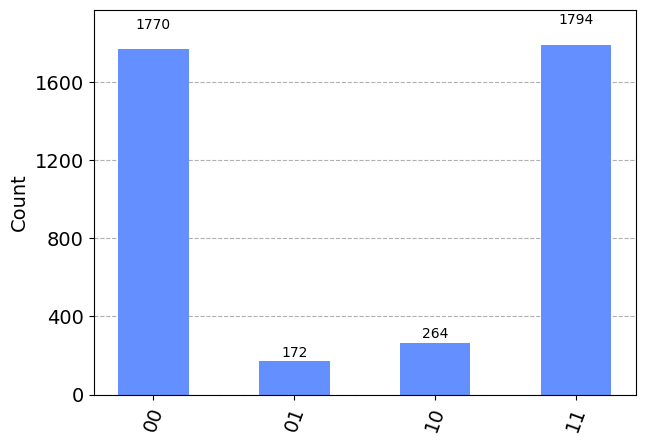

In [22]:
backend = provider.get_backend('ibm_kyoto')
job = backend.retrieve_job('cpjnktz6q5h0008bjcn0') # otro en ibm_kyoto-> cpkv0mt6q5h0008bmxtg

result = job.result()
counts = result.get_counts()
plot_histogram(counts)

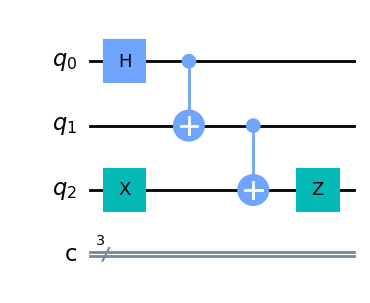

In [23]:
#calcula estado un estado similar al GHZ 1/sqrt(2)(|011⟩−|100⟩)
circuit = QuantumCircuit(3,3)
circuit.h(0)
circuit.x(2)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.z(2)

display(circuit.draw())

circuit.measure_all() # we measure all the qubits


También podemos especificar el `layout` que se utiliza para desplegar nuestro circuito en el dispositivo. 

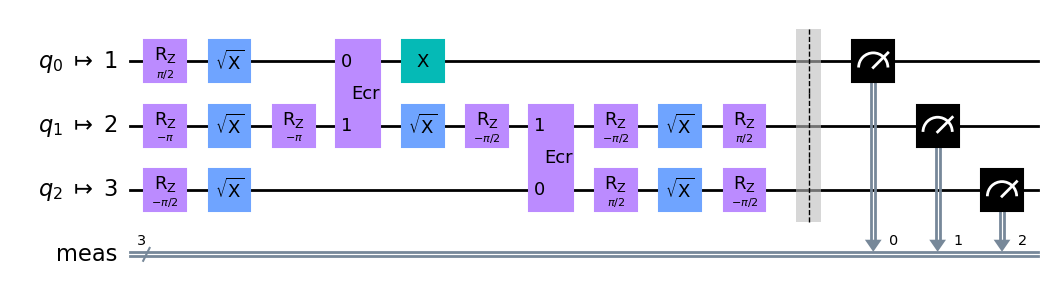

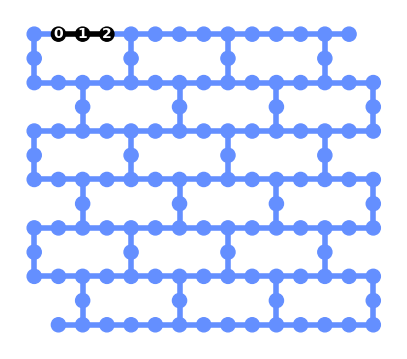

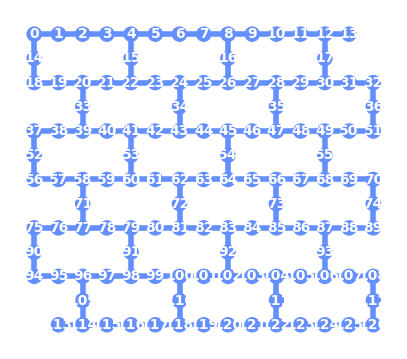

In [25]:
transpiled_circuit = transpile(circuit, backend, initial_layout=[1, 2, 3]) #elegimos como qubits 0,1 de nuestro circuito -> los qubits del dispositivo 2,3
display(transpiled_circuit.draw(idle_wires=False))  #para evitar muchos qubits no usados en la representacion
display(plot_circuit_layout(transpiled_circuit, backend))
plot_gate_map(backend)

#### EJERCICIO

Comprueba la complejidad del circuito transpilado anterior, si no elegimos qubits que estén conectados

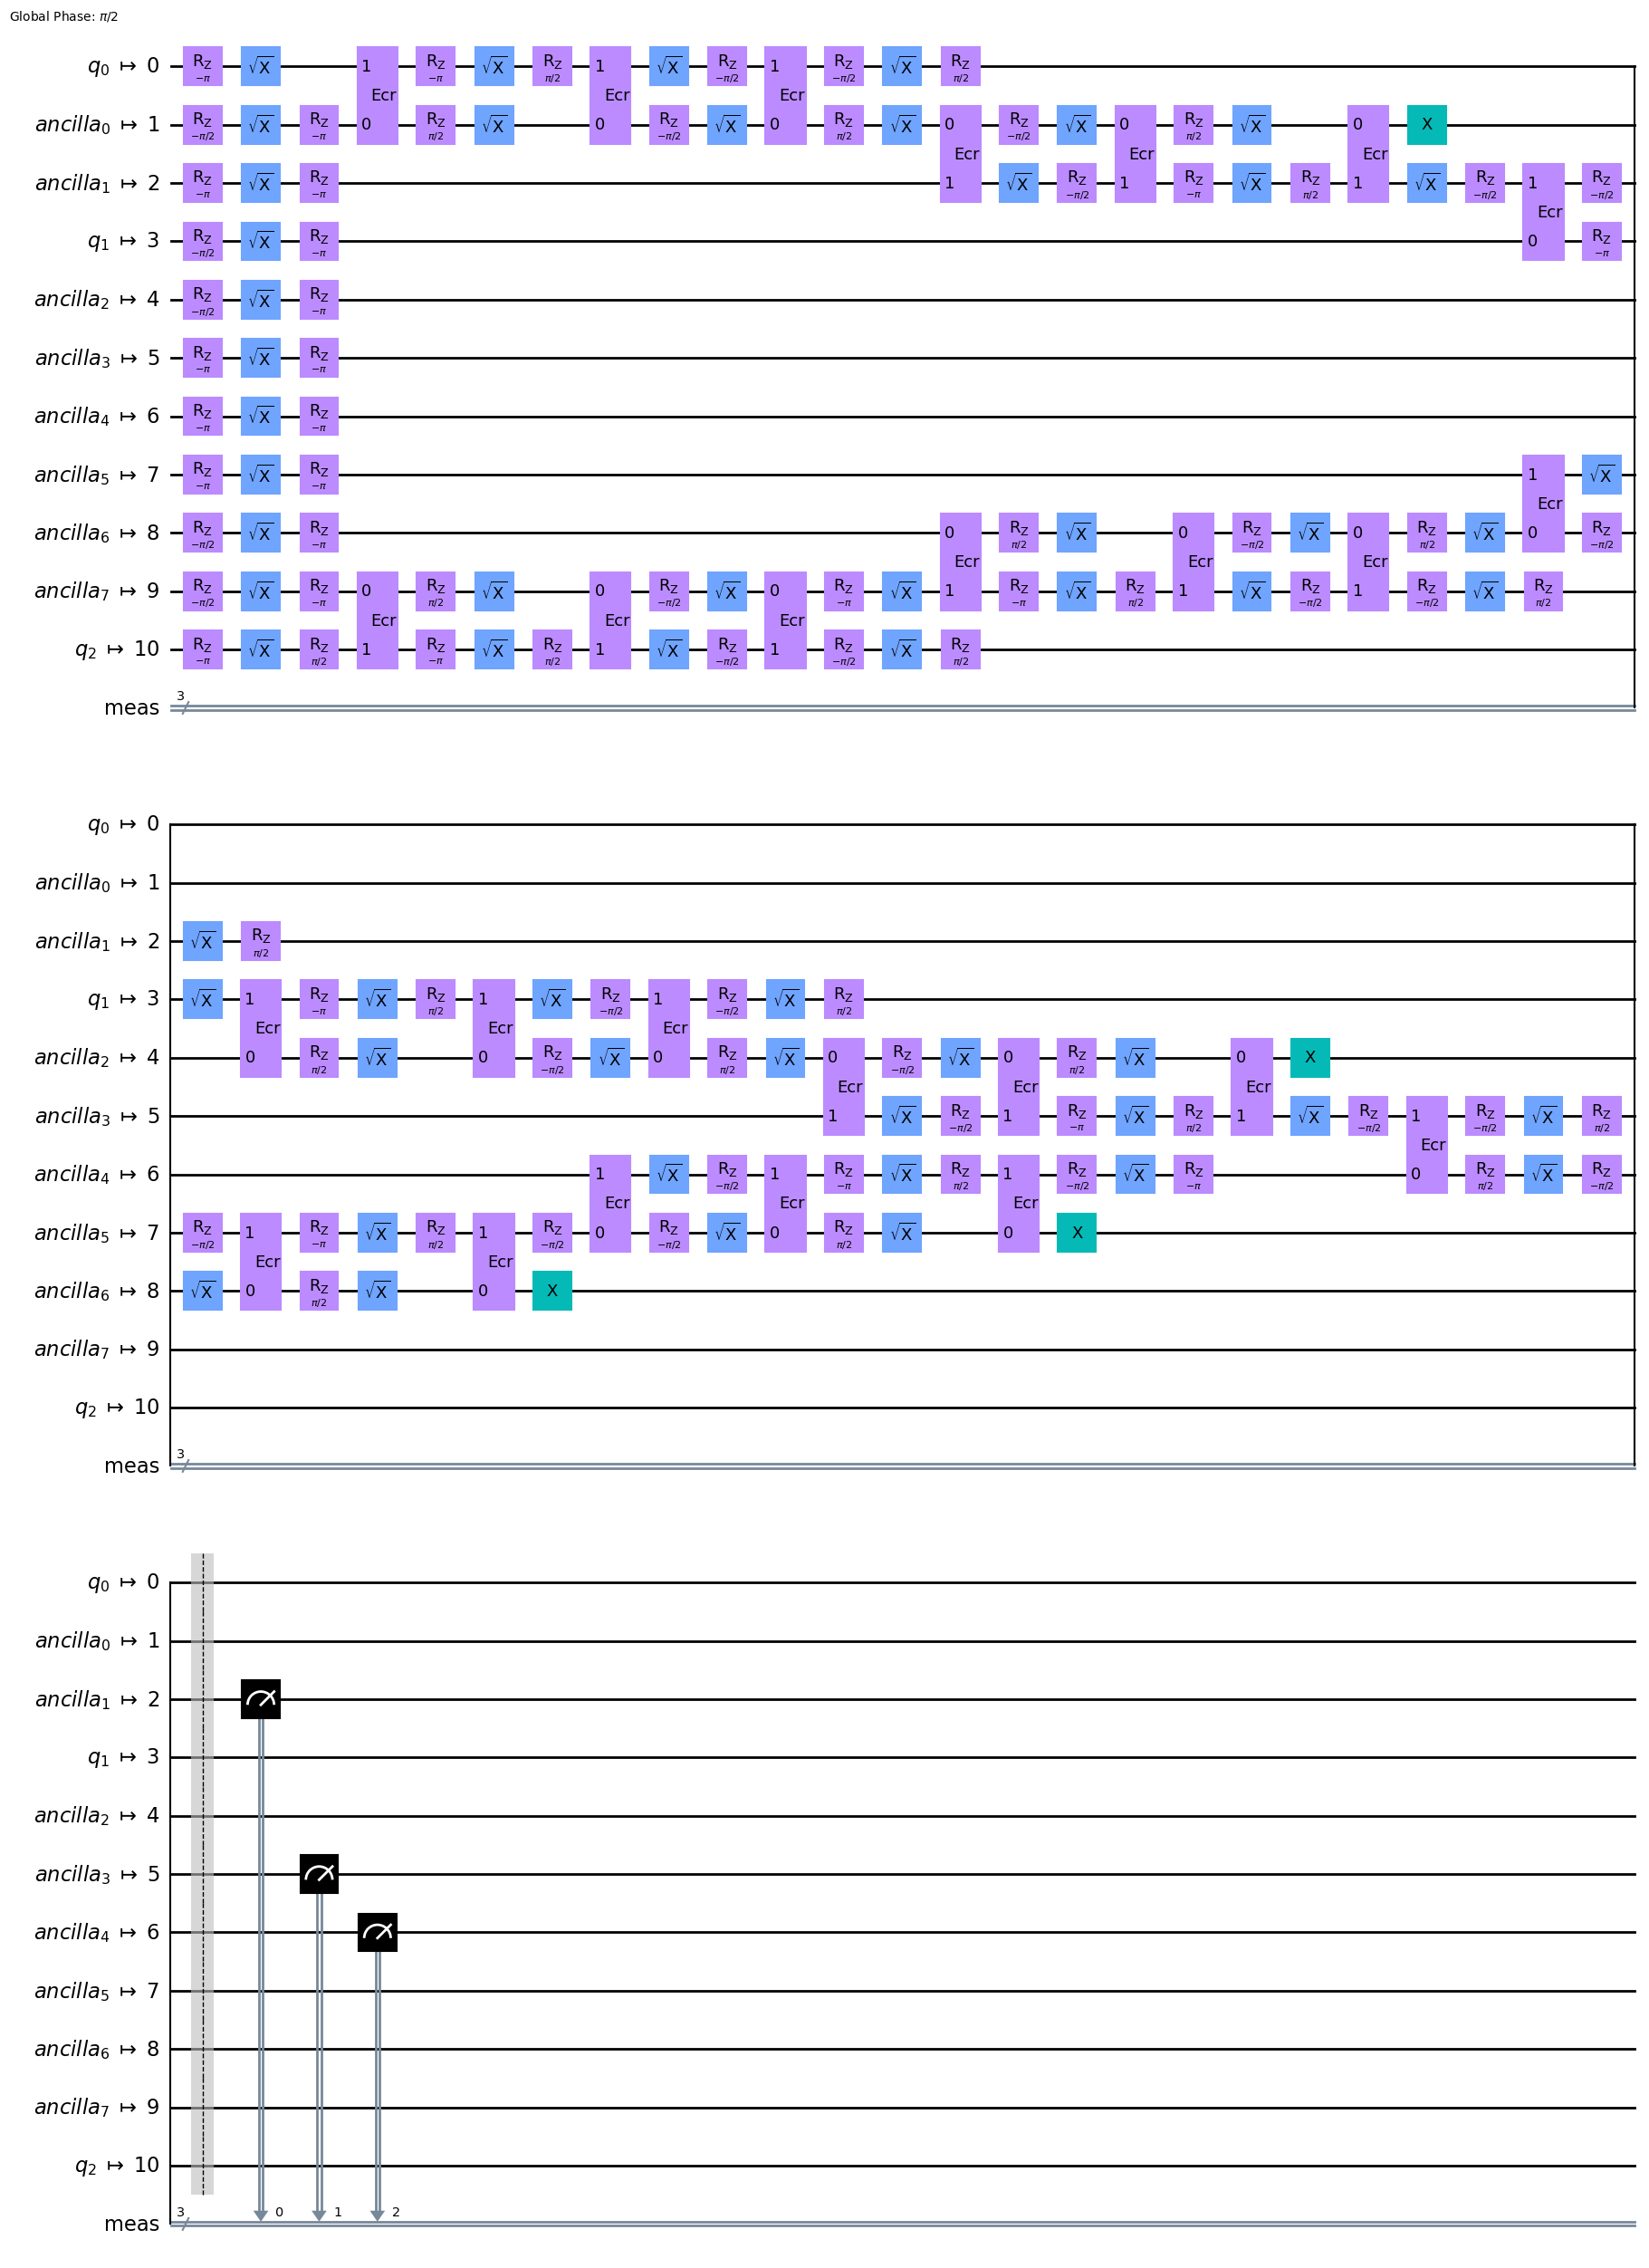

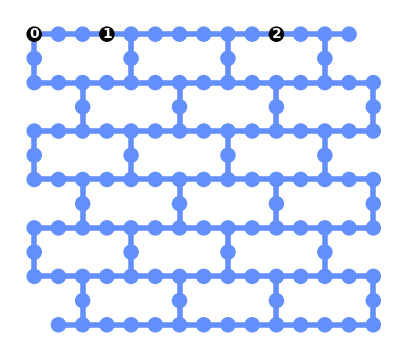

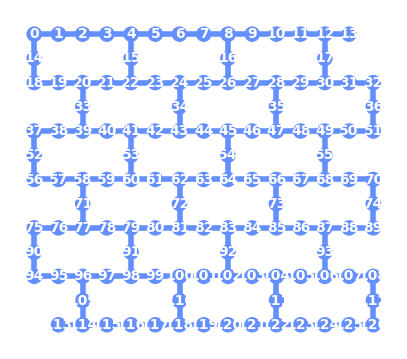

In [26]:
transpiled_circuit = transpile(circuit, backend, initial_layout=[0, 3, 10]) #elegimos como qubits 0,1 de nuestro circuito -> los qubits del dispositivo 2,3
display(transpiled_circuit.draw(idle_wires=False))  #idle_wires quita qubits no usados, la opcion fold controla la paginacion al dibujar el circuito, es este caso con valor -1 esta desactivada y 
display(plot_circuit_layout(transpiled_circuit, backend))
plot_gate_map(backend)

#### EJERCICIO

Para un circuito dado, elije el backend de ejecucion menos ocupado y transpilalo para su ejecucion.

Mapea tres qubits que esten conectados y dibuja el circuito resultante que se ejecutará en el ordenador cuántico.

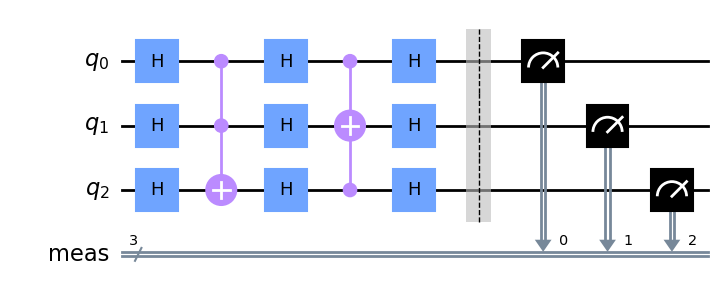

In [27]:
# Creamos este circuito
circuit = QuantumCircuit(3)
circuit.h([0,1,2])
circuit.ccx(0, 1, 2)
circuit.h([0,1,2])
circuit.ccx(2, 0, 1)
circuit.h([0,1,2])
circuit.measure_all()
circuit.draw()

In [28]:
#Buscamos el Backend menos cargado
backend = least_busy(provider.backends(
                simulator=False,
                filters=lambda b: b.configuration().n_qubits >= 2))
backend

<IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>

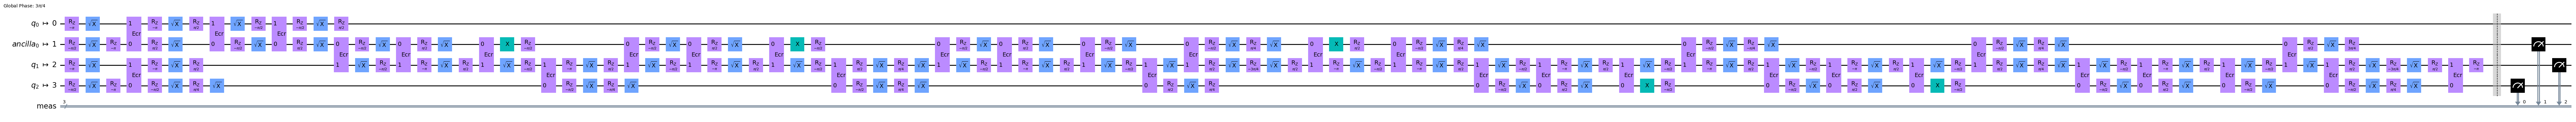

In [32]:
#Transpilamos nuestro circuito para este Backend
transpiled_circuit = transpile(circuit, backend, initial_layout=[0, 2, 3])  #elegimos como qubits 0,1,2 de nuestro circuito -> los qubits del dispositivo 0,2,3
display(transpiled_circuit.draw(fold=-1, idle_wires=False))  #la opcion fold controla la paginacion al dibujar el circuito, es este caso con valor -1 esta desactivada y idle_wires quita qubits no usados

Observamos la complejidad del circuito, si no elegimos qubits que estén conectados

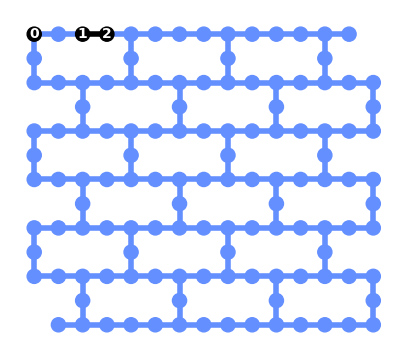

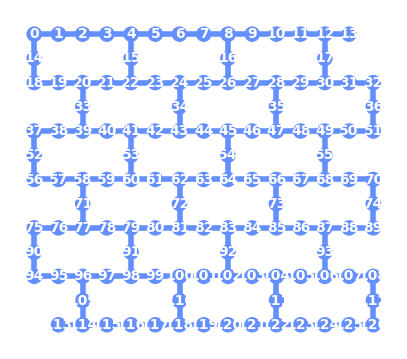

In [30]:
#Dibujamos como se ha desplegado el circuito en el backend y el mapa de puertas que hay disponibles para conectar los qubits
display(plot_circuit_layout(transpiled_circuit, backend))
plot_gate_map(backend)

## Otras opciones de Backend

### Nivel de optimizacion

Podemos dejar que qiskit optimice el layout de nuestro circuito en el hardware cuantico. Los niveles más altos son niveles de mayor nivel de optimizacion a costa de un tiempo mayor para el transpiling

 * 0: sin optimizacion, mas alla de un despliegue con un mapeo especifico en el backend
 * 1: optimizacion ligera, colapsando puertas adyacentes en los qubits cercanos (default)
 * 2: optimizacion media con mapeado adaptativo de qubits, teniendo en cuenta el ruido de los qubits y las puertas y posibles efectos que lo aminoren o compensen entre si.
 * 3: optimizacion alta con mapeo adatativo de ruido de los qubits y puertas, para buscar que se aminore y compense
 
Veamos un ejemplo de utilizacion de este nivel de optimizacion:

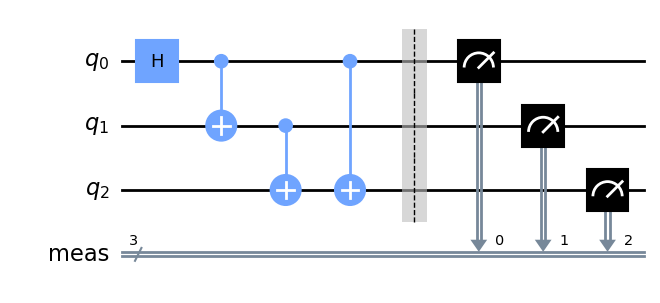

In [38]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1,2)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw()

In [39]:
from qiskit import transpile

transpiled_circuit = transpile(circuit, backend,optimization_level=0)
transpiled_circuit.draw( idle_wires=False)
print(transpiled_circuit.count_ops(),transpiled_circuit.depth())

OrderedDict([('rz', 52), ('sx', 19), ('ecr', 6), ('x', 6), ('measure', 3), ('barrier', 1)]) 48


#### EJERCICIO

Comprueba la complejidad del circuito transpilado en los cuatro niveles de optimizacion disponibles

In [40]:
level0 = transpile(circuit, backend, optimization_level=0)
level1 = transpile(circuit, backend, optimization_level=1)
level2 = transpile(circuit, backend, optimization_level=2)
level3 = transpile(circuit, backend, optimization_level=3)

In [42]:
for level in [level0, level1, level2, level3]:
    print(level.count_ops(), level.depth())

OrderedDict([('rz', 52), ('sx', 19), ('ecr', 6), ('x', 6), ('measure', 3), ('barrier', 1)]) 48
OrderedDict([('rz', 16), ('sx', 11), ('ecr', 6), ('measure', 3), ('x', 2), ('barrier', 1)]) 22
OrderedDict([('rz', 20), ('sx', 14), ('ecr', 6), ('measure', 3), ('x', 1), ('barrier', 1)]) 26
OrderedDict([('rz', 28), ('sx', 18), ('ecr', 6), ('measure', 3), ('x', 1), ('barrier', 1)]) 33


La operacion de transpiling es un proceso estocástico, esto es, algo aleatorio y para que sea repetible podemos utilizar la opcion de fijar la semilla de inicio.

Prueba diferentes valores `seed_transpiler=0` y `seed_transpiler=11`  por ejemplo

22


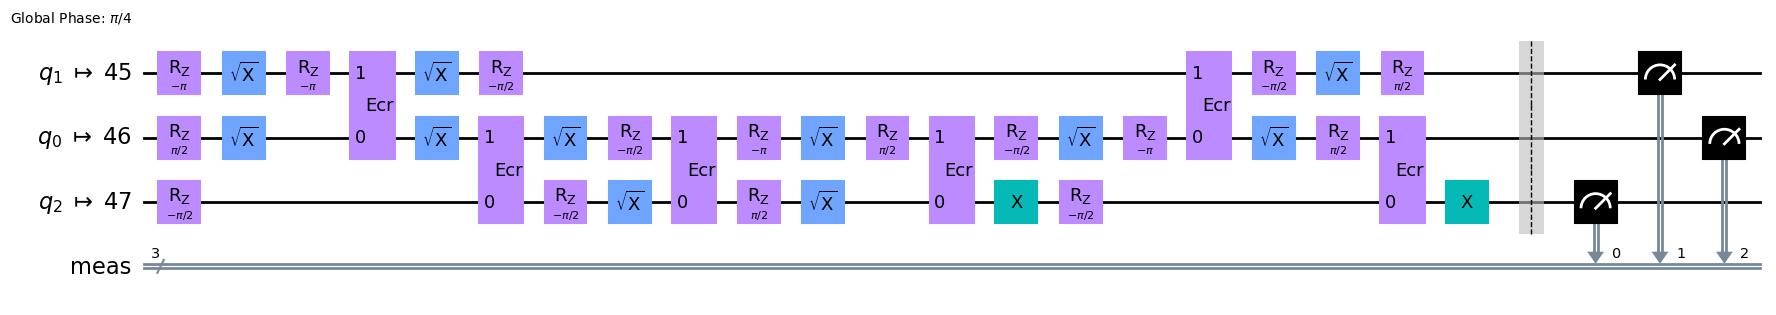

In [43]:
transpiled = transpile(circuit, backend, optimization_level=2, seed_transpiler=0)
print(transpiled.depth())
transpiled.draw(idle_wires=False, fold=-1)

24


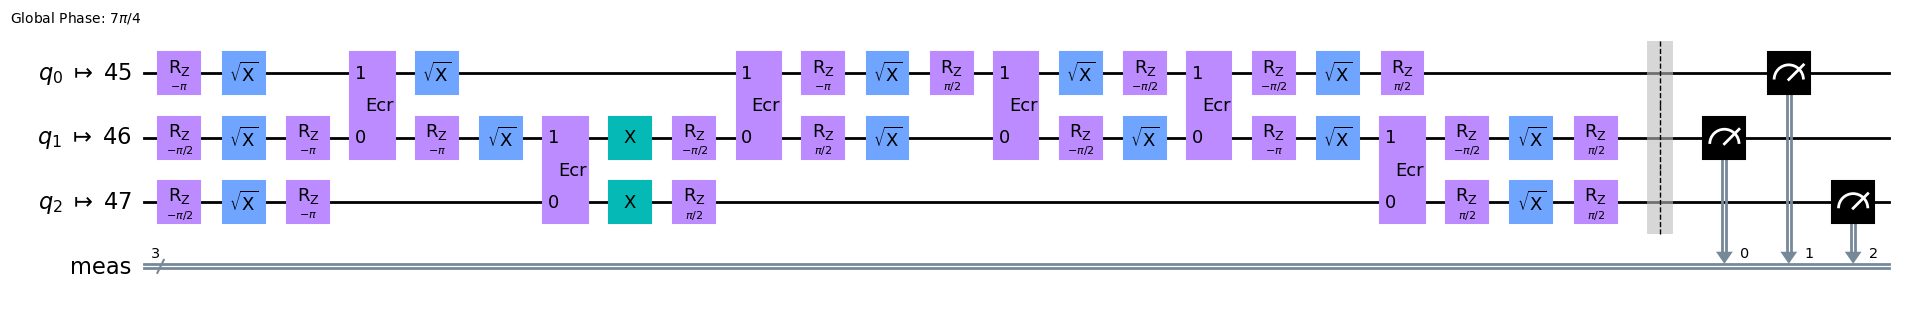

In [44]:
transpiled = transpile(circuit, backend, optimization_level=2, seed_transpiler=11)
print(transpiled.depth())
transpiled.draw(idle_wires=False, fold=-1)

### Las puertas base que soporta el dispositivo


Veamos las puestas de base del Backend

In [39]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'ecr', 'reset']

Podemos forzar a hacer un transpiling con unas determinadas puertas de base

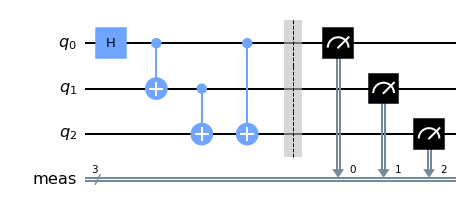

In [ ]:
transpiled = transpile(circuit, basis_gates=['x', 'cx', 'h', 'p'])
transpiled.draw(fold=-1)

#### EJERCICIO

Dado un circuito, prueba hacer un transpilado al backend cuantico que no contenga alguna de las puertas base del backend

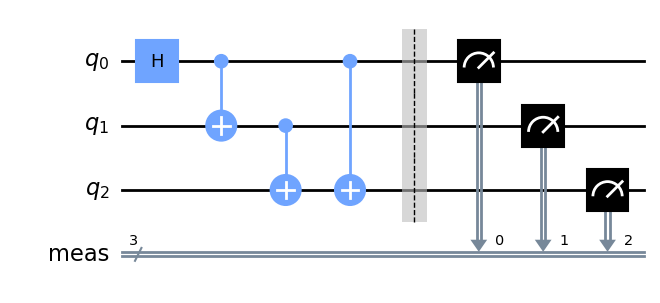

In [46]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1,2)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw()

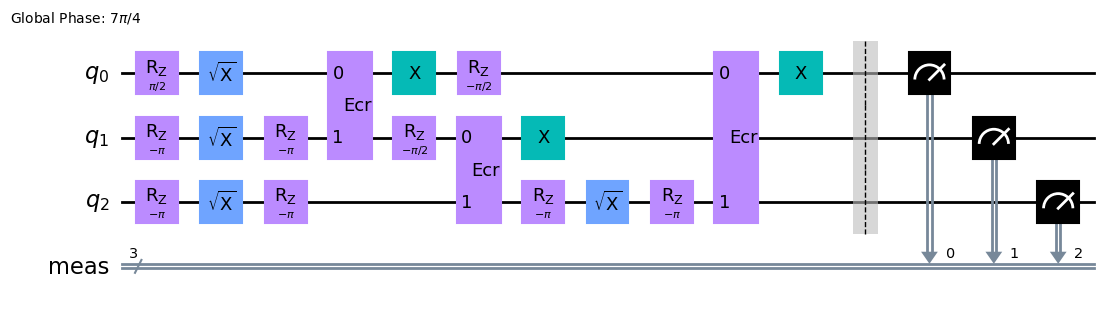

In [49]:
transpiled = transpile(circuit, basis_gates=['id', 'rz', 'sx', 'x', 'ecr']) #quitando 'reset'
transpiled.draw(fold=-1,idle_wires=False)

### Controlando el despliegue del circuito en el dispositivo con `CouplingMap` e `initial_layout`

Podemos comprobar el `coupling_map` del backend de ejecucion cuantico

In [50]:
backend.configuration().coupling_map

[[1, 0],
 [2, 1],
 [2, 3],
 [3, 4],
 [5, 4],
 [6, 5],
 [6, 7],
 [7, 8],
 [8, 16],
 [9, 8],
 [9, 10],
 [11, 10],
 [12, 11],
 [13, 12],
 [14, 0],
 [14, 18],
 [15, 4],
 [16, 26],
 [17, 12],
 [17, 30],
 [18, 19],
 [20, 19],
 [21, 20],
 [21, 22],
 [22, 15],
 [23, 22],
 [24, 23],
 [24, 25],
 [24, 34],
 [25, 26],
 [27, 26],
 [27, 28],
 [28, 29],
 [28, 35],
 [30, 29],
 [31, 30],
 [31, 32],
 [33, 20],
 [35, 47],
 [36, 32],
 [37, 38],
 [37, 52],
 [39, 33],
 [39, 38],
 [40, 39],
 [40, 41],
 [42, 41],
 [42, 43],
 [43, 34],
 [43, 44],
 [45, 44],
 [45, 46],
 [45, 54],
 [46, 47],
 [48, 47],
 [48, 49],
 [49, 50],
 [50, 51],
 [51, 36],
 [52, 56],
 [53, 41],
 [55, 49],
 [57, 56],
 [57, 58],
 [58, 71],
 [59, 58],
 [59, 60],
 [60, 53],
 [61, 60],
 [61, 62],
 [62, 72],
 [63, 62],
 [64, 54],
 [64, 63],
 [65, 64],
 [66, 65],
 [66, 73],
 [67, 66],
 [68, 55],
 [68, 67],
 [68, 69],
 [69, 70],
 [71, 77],
 [74, 70],
 [75, 76],
 [76, 77],
 [78, 77],
 [78, 79],
 [79, 80],
 [81, 72],
 [81, 80],
 [81, 82],
 [83, 82],

#### EJERCICIO

Investiga las opciones de la funcion [`transpile`](https://docs.quantum.ibm.com/api/qiskit/0.28/qiskit.compiler.transpile#qiskitcompilertranspile)

Dado un circuito, prueba diferentes opciones de transpilacion:

- coupling_map -> [(0,1),(1,2)] 
- initial_layout -> [1, 0, 2], 
- basis_gates -> ['x', 'cx', 'h', 'p'], 
- optimization_level -> 3, 
- approximation_degree -> 0.99

y observa la complejidad del circuito transpilado midiendo las operaciones y la profundidad resultates.
Dibuja tambien el circuito.


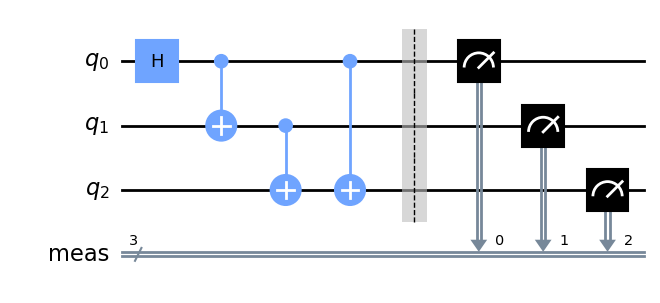

In [52]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1,2)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw()

In [62]:
from qiskit.transpiler import CouplingMap

cm=CouplingMap([(0,1),(1,2)])
               

transpiled = transpile(circuit, 
                       coupling_map=cm, 
                       initial_layout=[1, 0, 2], 
                       basis_gates=['x', 'cx', 'h', 'p'], 
                       optimization_level=3, 
                       approximation_degree=0.01)
            
print(transpiled.count_ops(), transpiled.depth())
display(transpiled.draw(fold=-1,idle_wires=False))

#se puede quitar la puerta 'x', el initial_layout y ver si varia el depth

OrderedDict([('p', 12), ('h', 10), ('measure', 3), ('barrier', 1)]) 14


## IonQ con Qiskit

Podemos ejecutar otro sofgware, como por ejemplo el de IonQ desde Qiskit

In [ ]:
!pip install qiskit-ionq

In [ ]:
from qiskit_ionq import IonQProvider
provider = IonQProvider(<your token>)

In [ ]:
[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

In [ ]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw()

In [ ]:
backend = provider.get_backend("ionq_qpu")
job = backend.run(circuit)

In [ ]:
plot_histogram()

In [ ]:
job.get_counts()

In [ ]:
plot_histogram(job.get_counts())